# Hi :)

----

# Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Datasets

Destinations

In [10]:
Destinations= pd.read_csv('ml-engineer/datasets/Expanded_Destinations.csv')
Destinations.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


Users

In [12]:
Users= pd.read_csv('ml-engineer/datasets/Final_Updated_Expanded_Users.csv')
Users.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


Reviews

In [13]:
Reviews= pd.read_csv('ml-engineer/datasets/Final_Updated_Expanded_Reviews.csv')
Reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


User History

In [14]:
History= pd.read_csv('ml-engineer/datasets/Final_Updated_Expanded_UserHistory.csv')
History.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


----

# Destinations

In [15]:
Destinations.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [18]:
# Make a copy of the original dataset so we can work with it without changing the original dataset
destinations= Destinations.copy()

In [25]:
destinations.shape

(1000, 6)

Data type

In [19]:
destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DestinationID    1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   State            1000 non-null   object 
 3   Type             1000 non-null   object 
 4   Popularity       1000 non-null   float64
 5   BestTimeToVisit  1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


Statistical informations

In [29]:
si= destinations.describe()['Popularity'].reset_index()
si.index= si['index'].values
si.drop(columns= ['index'], inplace= True)
si

,Popularity
count,1000.000000
mean,8.513927
std,0.567083
min,7.504500
25%,8.034457
50%,8.496527
75%,9.020769
max,9.499811


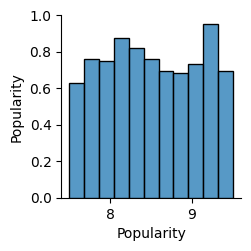

In [36]:
sn.pairplot(destinations.drop(columns= ['DestinationID']))

Null values

In [31]:
destinations.isnull().sum()

DestinationID      0
Name               0
State              0
Type               0
Popularity         0
BestTimeToVisit    0
dtype: int64